[Data Link](htthttps://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows?select=imdb_top_1000.csvp:// "Data Link")

| Column Name | Description  |
| :------------: | :------------: |
| Poster_Link  | Link of the poster that imdb using  |
| Series_Title  | Name of the movie  |
| Released_Year  | Year at which that movie released  |
| Certificate  | Certificate earned by that movie  |
| Runtime  | Total runtime of the movie  |
| Genre  | Genre of the movie  |
| MDB_Rating  | Rating of the movie at IMDB site  |
| Overview  | mini story/ summary  |
| Meta_score  | Score earned by the movie  |
| Director  | Name of the Director  |
| Star1,Star2,Star3,Star4  | Name of the Stars  |
| Noofvotes  | Total number of votes  |
| Gross  | Money earned by that movie  |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
def generate_colors(num):
    colors = []
    lst = list('ABCDEF0123456789')

    for i in range(num):
        colors.append('#'+''.join(np.random.choice(lst, 6)))
        
    return colors

# ----------------------------------------------------------------------
def missing_percentage(dataframe):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = dataframe.isnull().sum().sort_values(ascending=False)
    missing_values = total_missing[total_missing.values !=0]
    missing_cols = missing_values.index
    
    missing_cols = dataframe[missing_cols].dtypes.values

    per = round((missing_values/len(dataframe))*100, 2)
    missing_df = pd.DataFrame(missing_values, columns=['Number of missing values'])
    
    return missing_df.assign(Percentage=per, Dtype=missing_cols)
#-----------------------------------------------------------------------------
def show_distribution(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    colors = generate_colors(1)
    
    sns.boxplot(data=dataframe, x=col, ax=ax[0], palette=colors)
    ax[0].set_title(f'{col.title()} Boxplot')
    
    sns.histplot(data=dataframe, x=col, ax=ax[1], color=colors, kde=True)
    ax[1].set_title(f'{col.title()} Histogram')
    
    fig.suptitle(f'{col.title()} Distribution'.replace('_', ' '), fontsize=15, color='brown')
#-----------------------------------------------------------------------------------
def show_outliers_accordingTo_target(data_frame, numeric_cols, target_col):
    plt.figure(figsize=(20, 15))
    for i in range(len(numeric_cols)):
        plt.subplot(8,4, i+1)
        sns.scatterplot(data=data_frame, x=numeric_cols[i], y=target_col, color=generate_colors(1))
        plt.title(f'{numeric_cols[i].title()} According to the Target')
        plt.subplots_adjust
#-----------------------------------------------------------------------------------
def impute(value, col):
    """This function imputes nan values by random values from the column we deal with. This way keep the distribution approximitly 
    the same"""
    x = np.random.choice(data[col].dropna())
    if math.isnan(value):
        value = x
        return value
    else:
        return value

In [3]:
data = pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 74.3+ KB


In [5]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [6]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype
Gross,169,16.9,object
Meta_score,157,15.7,float64
Certificate,101,10.1,object


**Notes**:
- The dataset has 1000 rows with 16 columns
- It has missing values in 3 columns we need to deal with them:
    - Gross
    - Meta score
    - Certificate
- Some data types need to be cleaned :
    - from object to numeric :
        - Runtime
        - Released Year
        - Gross

## <center> <font color='red'>Cleaning</center></font>

In [7]:
# make columns name lower to make it easy while using them
data.columns = data.columns.str.lower()
data.columns

Index(['poster_link', 'series_title', 'released_year', 'certificate',
       'runtime', 'genre', 'imdb_rating', 'overview', 'meta_score', 'director',
       'star1', 'star2', 'star3', 'star4', 'no_of_votes', 'gross'],
      dtype='object')

### Gross

In [8]:
data['gross'] = pd.to_numeric(data['gross'].str.replace(',', ''), errors='coerce')
data['gross']

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995            NaN
996            NaN
997     30500000.0
998            NaN
999            NaN
Name: gross, Length: 1000, dtype: float64

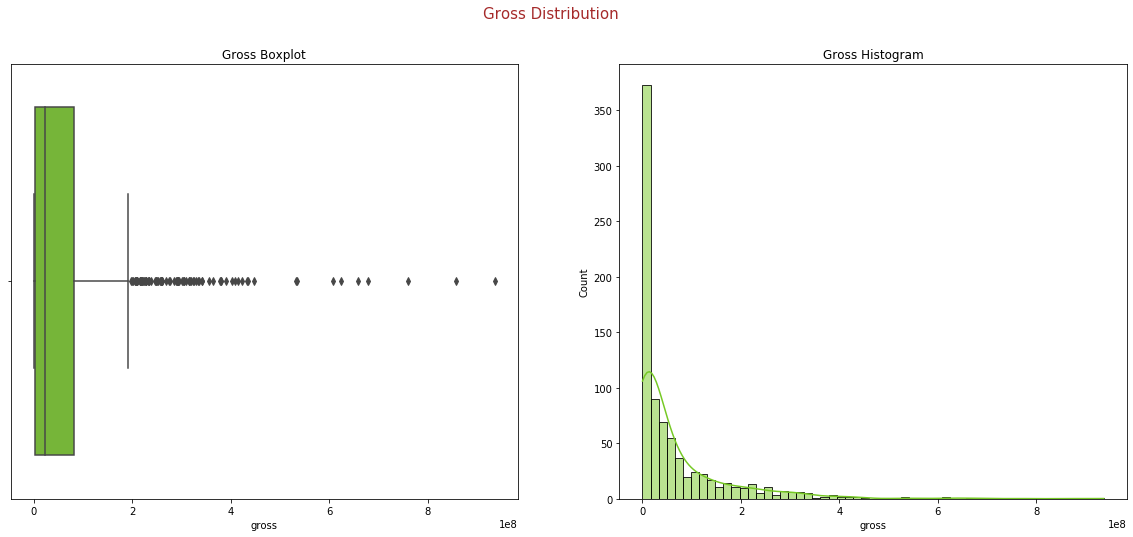

In [9]:
# Lets show the distribution of the column and then impute missing values
show_distribution(data, 'gross')

> The column is right skewed and have lots of outliers 

In [10]:
data['gross'].describe()

count    8.310000e+02
mean     6.803475e+07
std      1.097500e+08
min      1.305000e+03
25%      3.253559e+06
50%      2.353089e+07
75%      8.075089e+07
max      9.366622e+08
Name: gross, dtype: float64

In [11]:
data['gross'] = data['gross'].apply(lambda v: impute(v, 'gross'))

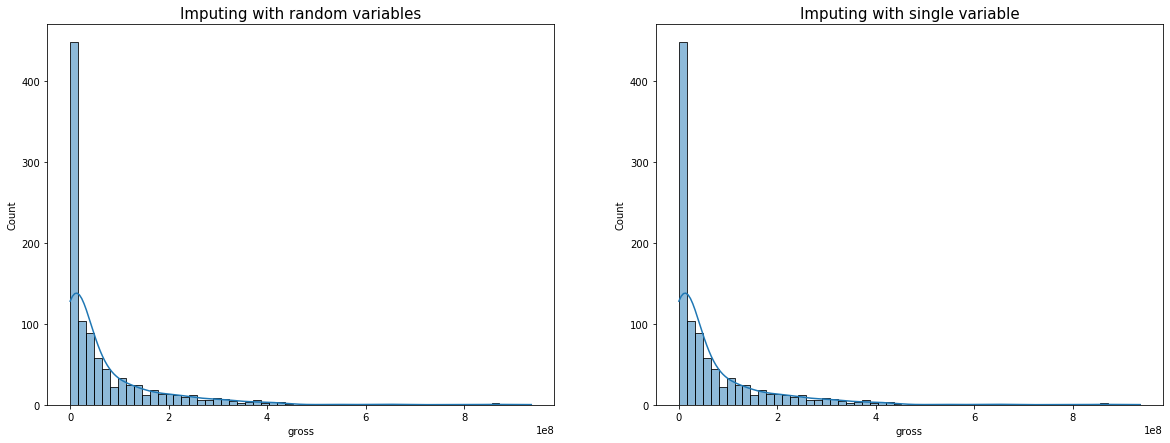

In [12]:
plt.figure(figsize=(20,7))

plt.subplot(121)
x = data['gross'].apply(lambda v: impute(v, 'gross'))
sns.histplot(x, kde=True)
plt.title('Imputing with random variables', fontsize=15);

plt.subplot(122)
x = data['gross'].fillna(data['gross'].median())
sns.histplot(x, kde=True)
plt.title('Imputing with single variable', fontsize=15);

> We can observe from these plots, when we impute with single value, the data becomes biased

In [13]:
data['gross'] = data['gross'].apply(lambda v: impute(v, 'gross'))

### Meta Score

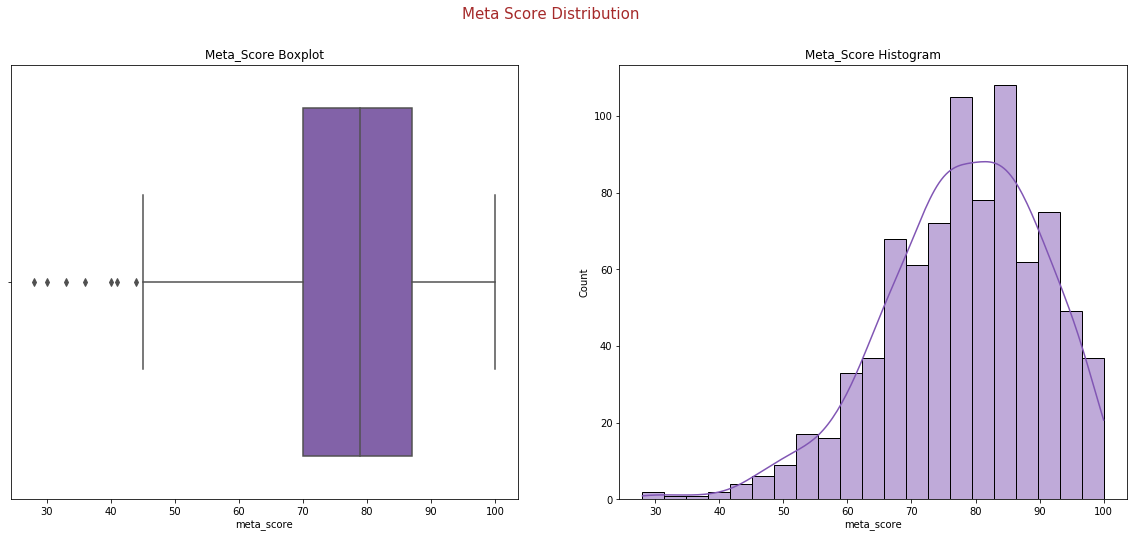

In [14]:
show_distribution(data, 'meta_score')

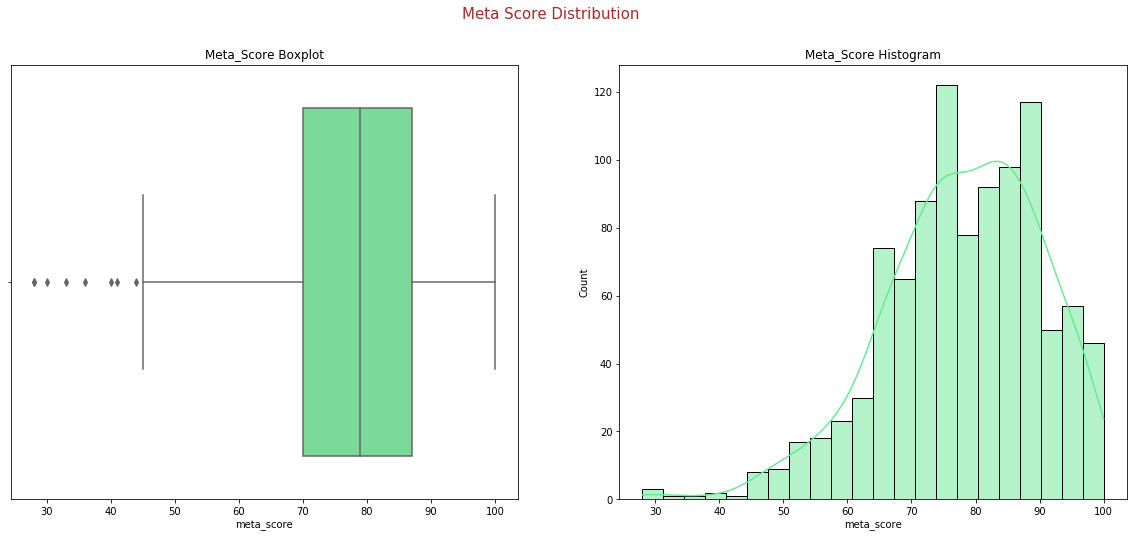

In [15]:
data['meta_score'] = data['meta_score'].apply(lambda v: impute(v, 'meta_score'))
show_distribution(data, 'meta_score')

### Certificate

> Certicate column means that certificate earned by that movie, so we can replace nan values with 'no certificate' because already all movies shouldn't take certificate

In [16]:
data['certificate'] = data['certificate'].fillna('no_certificate')
data['certificate']

0                   A
1                   A
2                  UA
3                   A
4                   U
            ...      
995                 A
996                 G
997            Passed
998    no_certificate
999    no_certificate
Name: certificate, Length: 1000, dtype: object

### Runtime

In [17]:
data['runtime'] = pd.to_numeric(data['runtime'].str.replace('min', ''))
data['runtime']

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: runtime, Length: 1000, dtype: int64

### Release Year

In [18]:
data['released_year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [19]:
data['released_year'] = pd.to_numeric(data['released_year'], errors='coerce')

In [20]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype
released_year,1,0.1,float64


In [21]:
data['released_year'] = data['released_year'].fillna(data['released_year'].mode()[0])
missing_percentage(data)

,Number of missing values,Percentage,Dtype


> <font color='blue'>**Now, cleaning is done........**</font>

## <center> <font color='red'>Analysis</center></font>

In [22]:
obj_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

print(f'Object columns : {obj_cols}', end='\n\n')
print(f'Numerical columns : {num_cols}')

Object columns : Index(['poster_link', 'series_title', 'certificate', 'genre', 'overview',
       'director', 'star1', 'star2', 'star3', 'star4'],
      dtype='object')

Numerical columns : Index(['released_year', 'runtime', 'imdb_rating', 'meta_score', 'no_of_votes',
       'gross'],
      dtype='object')


In [23]:
print('Number of unique values for each object column')
dic = {i:data[i].nunique() for i in obj_cols}
dic

Number of unique values for each object column


{'poster_link': 1000,
 'series_title': 999,
 'certificate': 17,
 'genre': 202,
 'overview': 1000,
 'director': 548,
 'star1': 660,
 'star2': 841,
 'star3': 891,
 'star4': 939}

In [24]:
for i in obj_cols[1:]:
    print(f'{i} unique number : {data[i].nunique()}', end='\n\n')
    #print(f'{i} unique values : {data[i].unique()}', end='\n\n')
    print(data[i].value_counts()[:10])
    print('======================================================')

series_title unique number : 999

Drishyam                        2
The Shawshank Redemption        1
Awakenings                      1
Tombstone                       1
The Sandlot                     1
The Remains of the Day          1
Naked                           1
The Fugitive                    1
A Bronx Tale                    1
Batman: Mask of the Phantasm    1
Name: series_title, dtype: int64
certificate unique number : 17

U                 234
A                 197
UA                175
R                 146
no_certificate    101
PG-13              43
PG                 37
Passed             34
G                  12
Approved           11
Name: certificate, dtype: int64
genre unique number : 202

Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Cr

## <center> <font color='red'>EDA</center></font>

In [25]:
cols = ['series_title', 'certificate', 'genre', 'director', 'star1', 'star2', 'star3', 'star4']

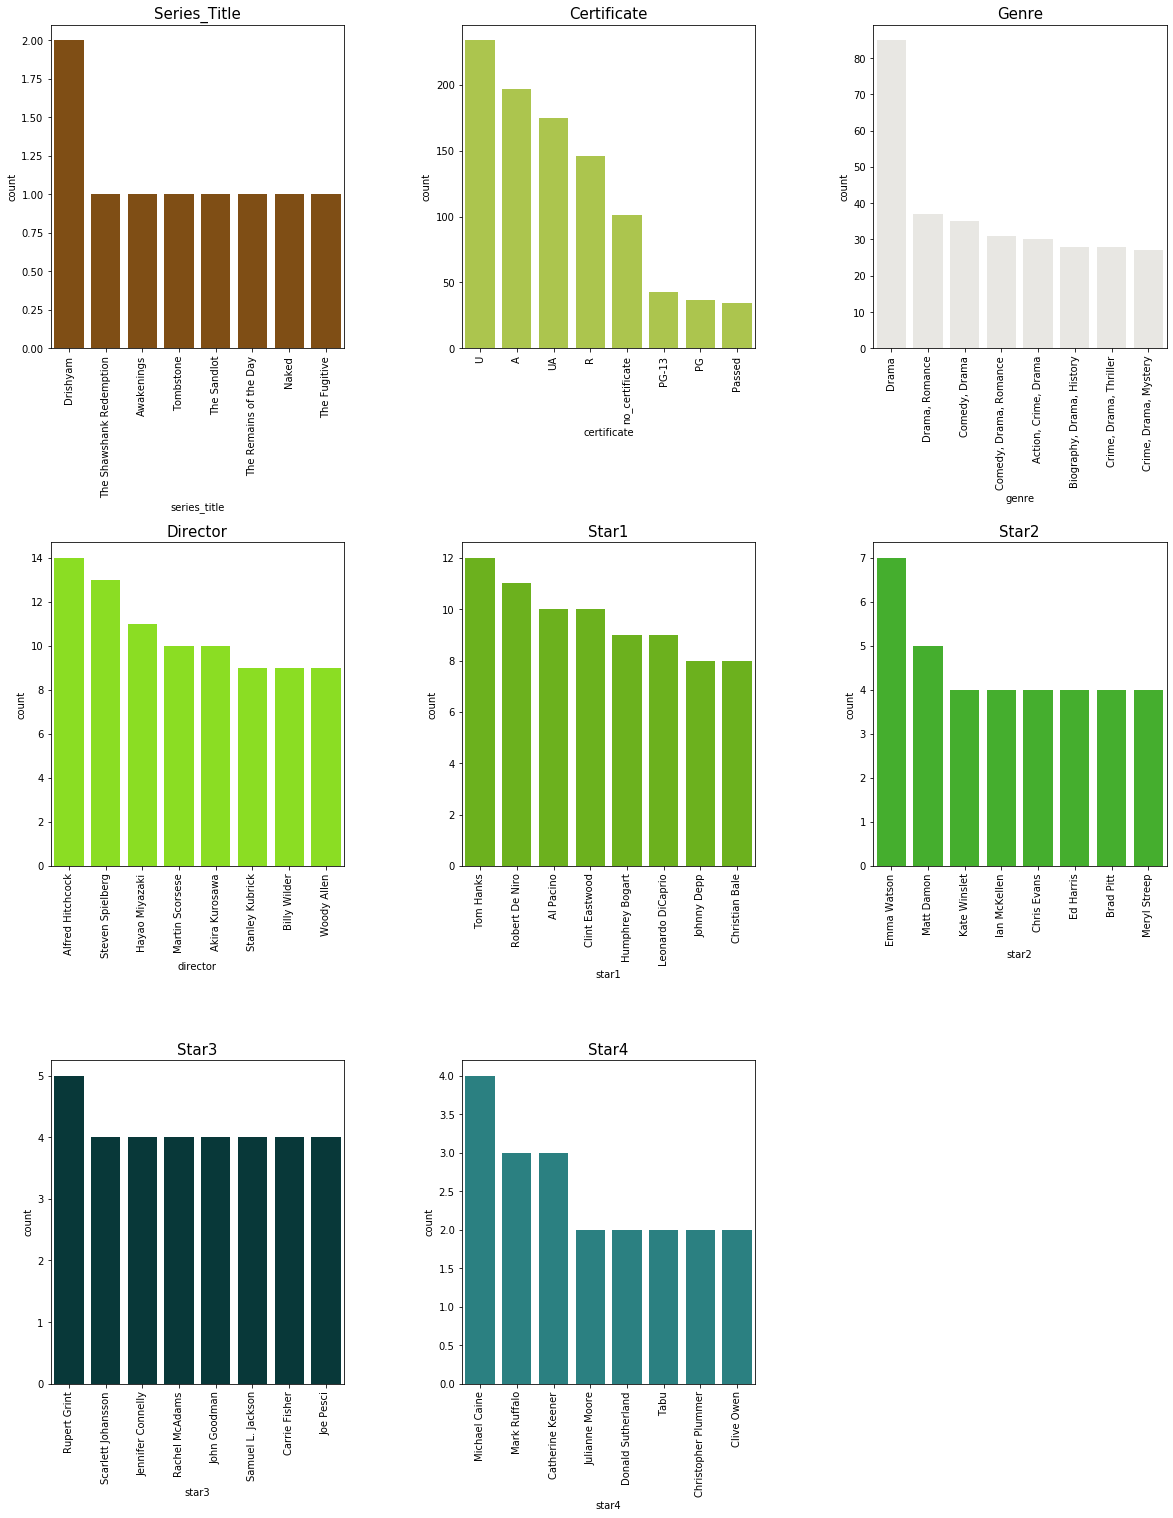

In [26]:
plt.figure(figsize=(20,25))

for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(data=data, x=cols[i], order=data[cols[i]].value_counts().index[:8], color=generate_colors(1)[0])
    plt.title(cols[i].title(), fontsize=15)
    plt.xticks(rotation=90)
    
#     for p in ax.patches:
#         height=p.get_height()
#         percent=(height*100)/float(len(data))
#         ax.text(p.get_x()+p.get_width()/2,height+1,'{:.0f}%'.format(percent),ha='center',weight='bold',fontsize=12)
        
plt.subplots_adjust(wspace=0.4, hspace=0.6)

In [27]:
df = data.copy()
df['genre'] = df['genre'].str.split(',')
df = df.explode('genre')
df['genre'] = df['genre'].str.strip()
df.head(3)

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0


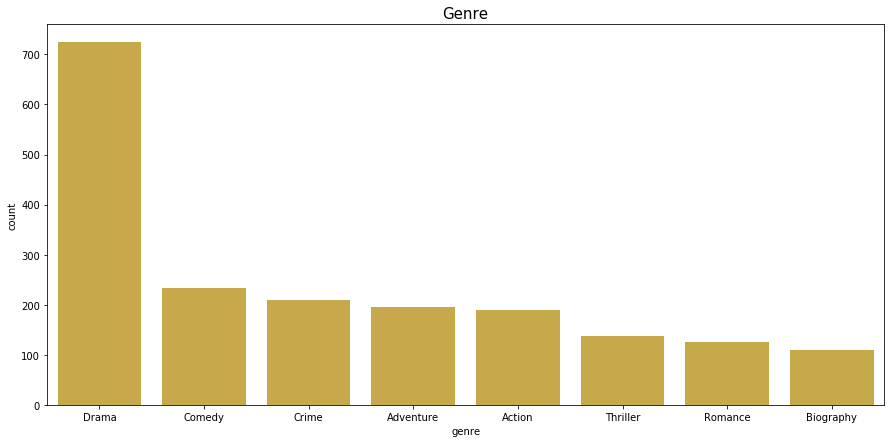

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index[:8], color=generate_colors(1)[0])
plt.title('Genre', fontsize=15);

### What is the year which has most releases?

In [195]:
u = dict(data.groupby(['released_year'])['series_title'].count())
u = dict(sorted(u.items(), key=lambda x:x[1], reverse=True))

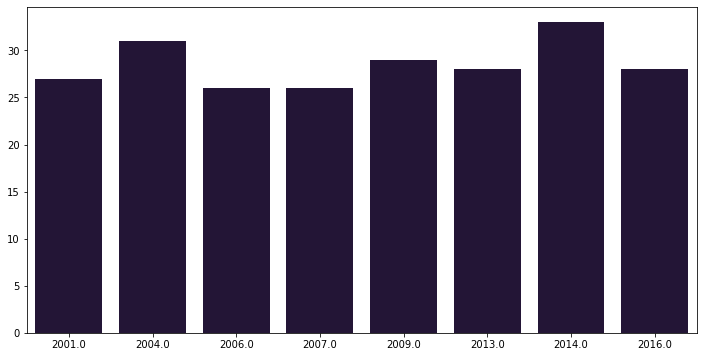

In [197]:
plt.figure(figsize=(12,6))
sns.barplot(y=list(u.values())[:8], x=list(u.keys())[:8], palette=generate_colors(1));

> 2014 has the most releases films, then 2004 was the second year which have the most releases in it

### What is the most year which has the certificate A?

In [31]:
certificate_A = data[data['certificate'].isin(['A'])]
certificate_A.head(3)

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0


In [40]:
certificate_A.reset_index(drop=True, inplace=True)

In [53]:
u = dict(certificate_A['released_year'].value_counts().sort_values(ascending=False))

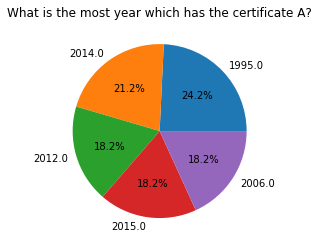

In [60]:
plt.pie(list(u.values())[:5], labels=list(u.keys())[:5], autopct='%1.1f%%');
plt.title('What is the most year which has the certificate A?');

> The most year which has the certificate A is 1995, and the second is 2014

In [75]:
# films which have certificate A in 1995
x_1995 = certificate_A[certificate_A['released_year'].isin([1995])].series_title.values

# films which have certificate A in 2014
x_2014 = certificate_A[certificate_A['released_year'].isin([2014])].series_title.values

In [79]:
pd.DataFrame({'1995':x_1995[:-1], '2014':x_2014})

,1995,2014
0,Se7en,Whiplash
1,The Usual Suspects,Gone Girl
2,Braveheart,Serbuan maut 2: Berandal
3,Heat,Nightcrawler
4,Casino,Boyhood
5,Twelve Monkeys,Kingsman: The Secret Service
6,Die Hard: With a Vengeance,Birdman or (The Unexpected Virtue of Ignorance)


### What about actors in movies which gain certificate A?

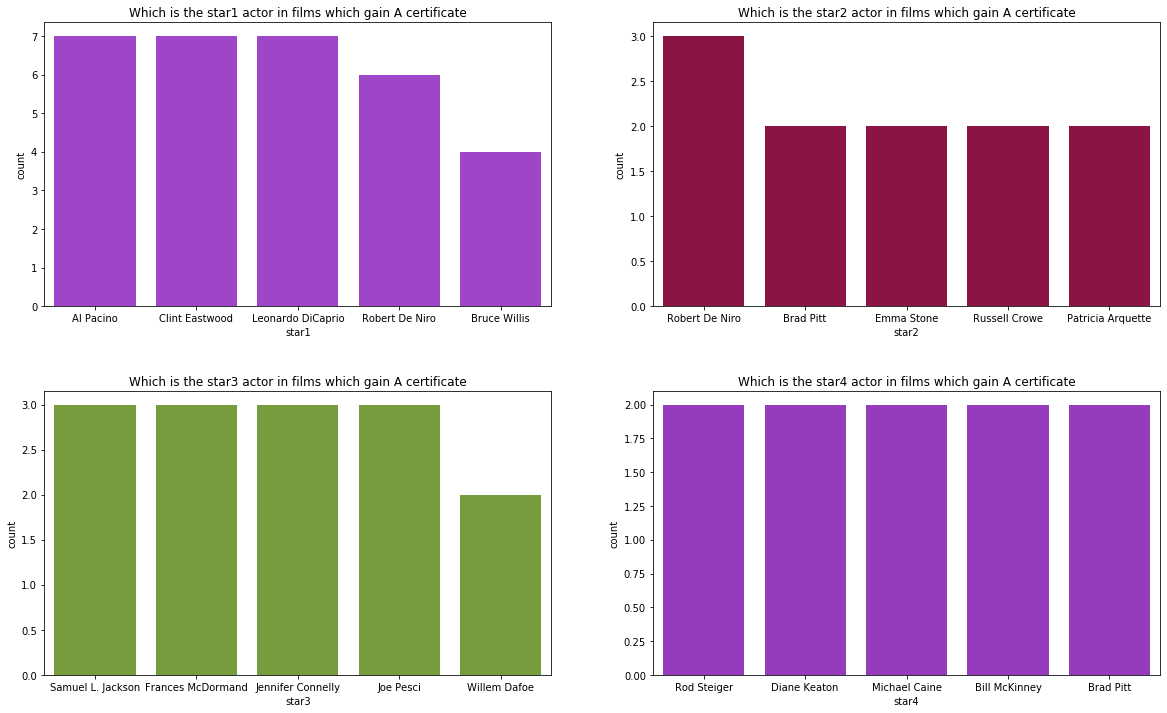

In [93]:
plt.figure(figsize=(20,12))
for count, col in enumerate(['star1', 'star2', 'star3', 'star4']):
    plt.subplot(2,2,count+1)
    sns.countplot(data=certificate_A, x=col, 
              order=certificate_A[col].value_counts().index[:5],
             color=generate_colors(1)[0]);
    plt.title(f'Which is the {col} actor in films which gain A certificate')

plt.subplots_adjust(hspace=0.3)

### gross according to certificate type

In [107]:
u = data.groupby('certificate')['gross'].median().sort_values(ascending=False)[:5]

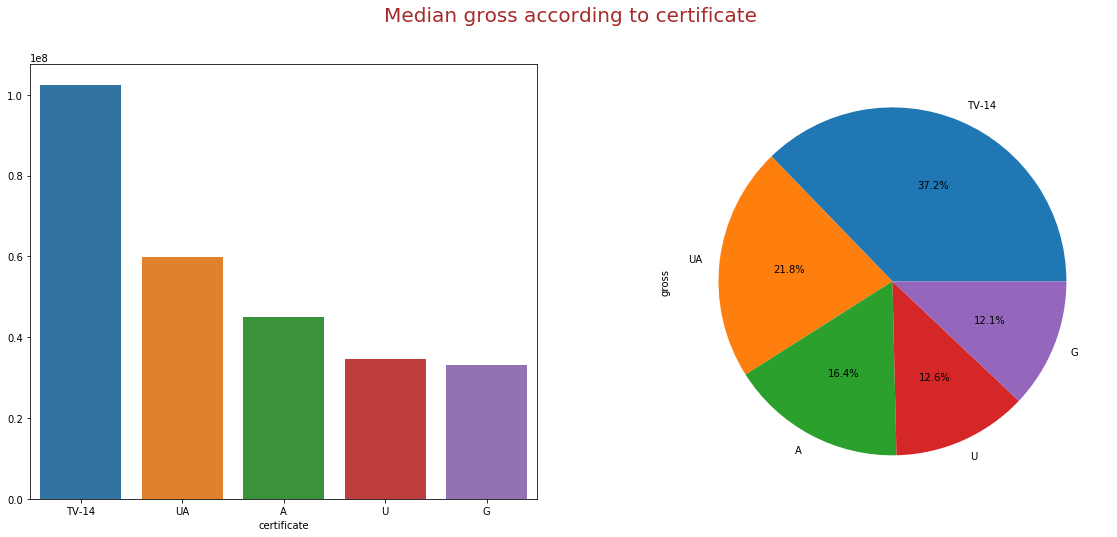

In [113]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.barplot(x=u.index, y=u.values);

plt.subplot(122)
u.plot.pie(autopct='%1.1f%%');

plt.suptitle('Median gross according to certificate', fontsize=20, color='brown');

> TV-14 certificate has 37.2% of gross while UA certificate has 21.8% of gross

### Visualizing according to year

In [193]:
def vis():
    
    new_2020 = data[data['released_year'].isin([2020])]
    new_2019 = data[data['released_year'].isin([2019])]
    new_2018 = data[data['released_year'].isin([2018])]
    
    all_df = [new_2020, new_2019, new_2018]
    text = ['2020', '2019', '2018']
    
    plt.figure(figsize=(20,50))
    
    for i, (df, txt) in enumerate(zip(all_df, text)):
        plt.subplot(5,2,i+1)
        df['certificate'].value_counts()[:4].plot.pie(autopct='%1.1f%%')
        plt.title(f'Certificates in {txt}', fontsize=15)
        
    movie_num = {text[i]:len(all_df[i]) for i in range(len(all_df))}
    
    plt.subplot(524)
    sns.barplot(x=list(movie_num.keys()), y=list(movie_num.values()))
    plt.title('Number of movies produced over years', fontsize=15)
    

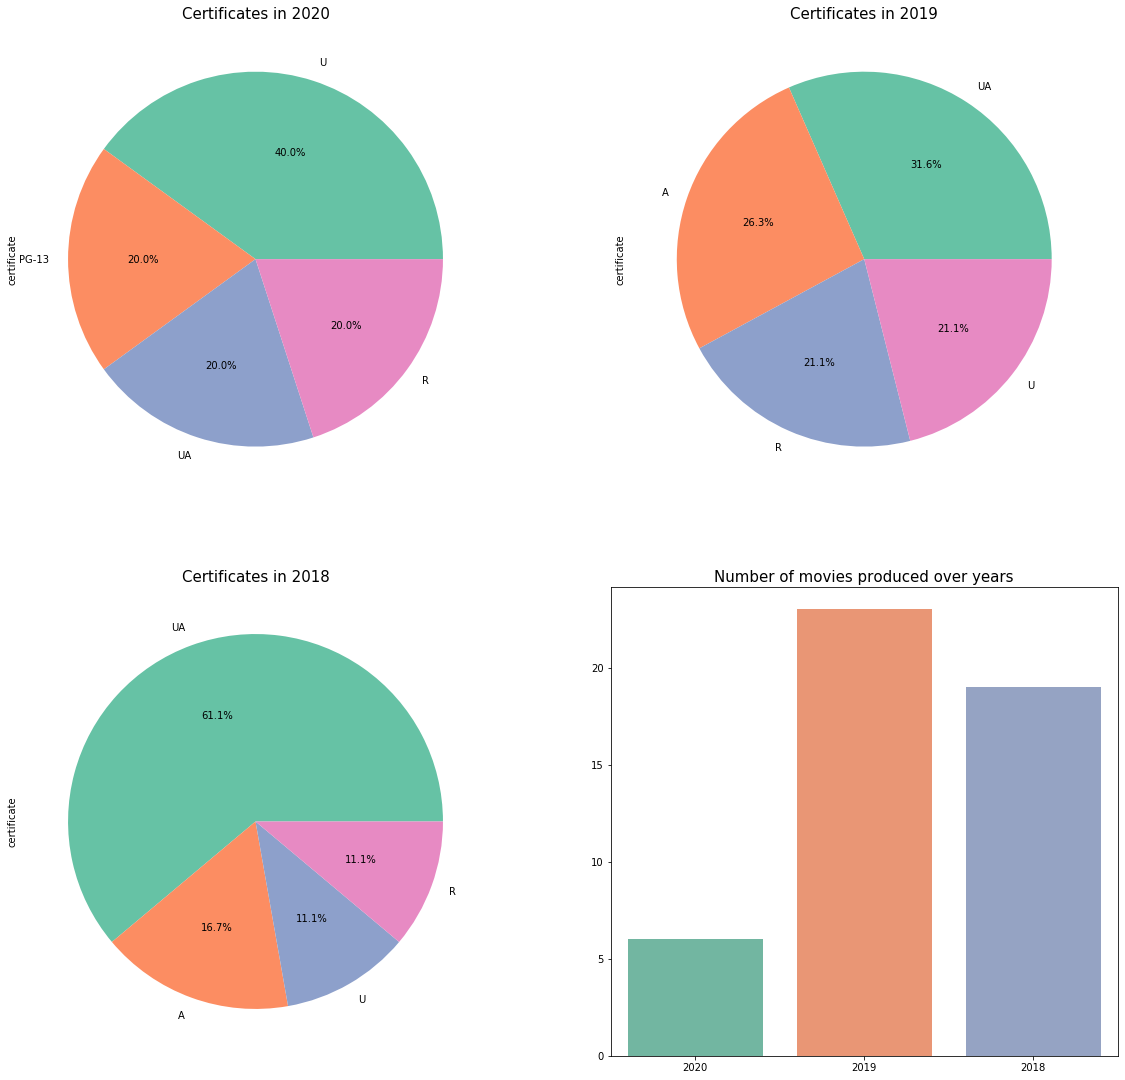

In [194]:
sns.set_palette("Set2")
vis()

### What is the movie which has the highest gross and information about it?

In [204]:
data[data['gross'] == max(data['gross'])]

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015.0,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0


### What is the movie which has the lowest gross and information about it?

In [205]:
data[data['gross'] == min(data['gross'])]

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
630,https://m.media-amazon.com/images/M/MV5BMTU4NT...,Adams æbler,2005.0,R,94,"Comedy, Crime, Drama",7.8,A neo-nazi sentenced to community service at a...,51.0,Anders Thomas Jensen,Ulrich Thomsen,Mads Mikkelsen,Nicolas Bro,Paprika Steen,45717,1305.0


### What is the movie which has the highest rate?

In [206]:
data[data['imdb_rating'] == max(data['imdb_rating'])]

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0


### What is the movie which has the lowest rate?

In [211]:
data[data['imdb_rating'] == min(data['imdb_rating'])]['series_title'].values

array(['Dark Waters', 'Searching', 'Once Upon a Time... in Hollywood',
       'Nelyubov', 'The Florida Project', 'Just Mercy', 'Gifted',
       'The Peanut Butter Falcon', 'Victoria', 'Mustang',
       'Guardians of the Galaxy Vol. 2', 'Baby Driver', 'Only the Brave',
       'Bridge of Spies', 'Incredibles 2', 'Moana', 'Sicario', 'Creed',
       'Leviafan', 'Hell or High Water', 'Philomena',
       'Dawn of the Planet of the Apes', 'El cuerpo', 'Serbuan maut',
       'End of Watch', 'Kari-gurashi no Arietti', 'A Star Is Born',
       'True Grit', 'Hævnen', 'Despicable Me', '50/50', 'Kick-Ass',
       'Celda 211', 'Moneyball', 'La piel que habito', 'Zombieland',
       'Die Welle', 'Sherlock Holmes', 'The Blind Side', 'The Visitor',
       'Seven Pounds', 'Eastern Promises', 'Stardust',
       'The Secret of Kells', 'Inside Man', 'Gone Baby Gone',
       'La Vie En Rose', 'Huo Yuan Jia', 'The Illusionist',
       "Dead Man's Shoes", 'Harry Potter and the Half-Blood Prince',
       '300'

> **Note:** The lowest rate is 7.6